# bin50

In [3]:
library(Seurat)
library(data.table)
library(dplyr)
#library(SeuratDisk)
options(scipen=100000)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
bin_exp <- fread('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/S2/bin50_exp.csv',header = T,sep = ',',check.names = F)
bin_exp <- as.data.frame(bin_exp)
rownames(bin_exp) <- as.character(bin_exp[,1])
bin_exp <- bin_exp[,2:ncol(bin_exp)]

In [ ]:
bin_exp[1:2,1:2]

In [ ]:
bin_metadata <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/S2/bin50_metadata.csv',header=T,sep=',',check.names = F)
rownames(bin_metadata) <- as.character(bin_metadata[,1])
bin_metadata <- bin_metadata[,2:ncol(bin_metadata)]

In [ ]:
spatial <- CreateSeuratObject(counts = t(bin_exp), project = "lung", min.cells = 10, min.features = 200)

In [ ]:
spatial@meta.data[c('15891379000000','31782758000000'),]

In [ ]:
bin_metadata[c('15891379000000','31782758000000'),]

In [ ]:
spatial@meta.data <- cbind(spatial@meta.data,bin_metadata[rownames(spatial@meta.data),])

In [ ]:
spatial[["percent.mt"]] <- PercentageFeatureSet(spatial, pattern = "^mt-")

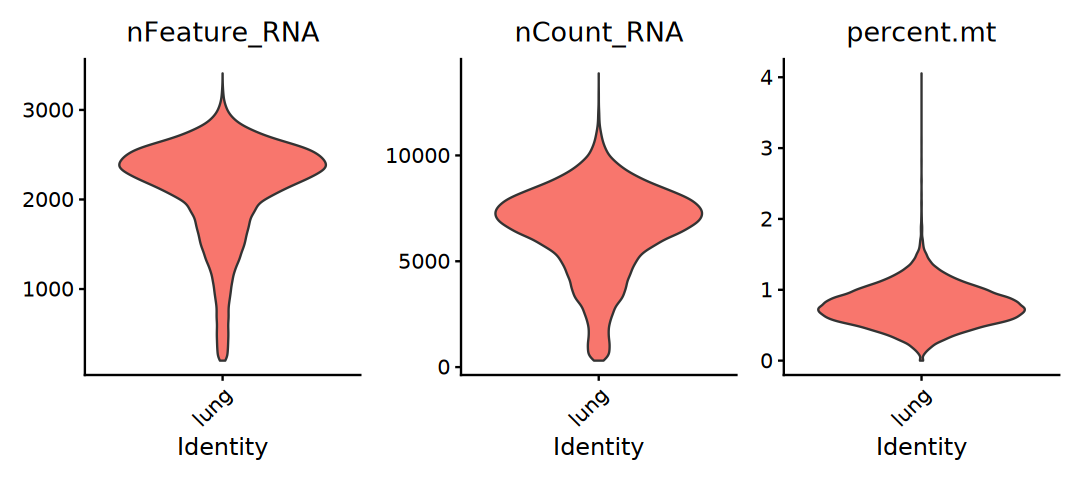

In [36]:
options(repr.plot.width = 9, repr.plot.height = 4)
VlnPlot(spatial, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size=0)

In [ ]:
spatial

In [ ]:
library(ggplot2)
options(repr.plot.width = 8, repr.plot.height = 6.5)
ggplot(spatial@meta.data,aes(x=x,y=y,color=nCount_RNA)) + geom_point(size=0.1)

In [ ]:
spatial <- SCTransform(spatial, verbose = FALSE)
spatial <- RunPCA(spatial, assay = "SCT", verbose = F)

In [3]:
spatial <- RunUMAP(spatial, dims = 1:30, verbose = FALSE)
spatial <- FindNeighbors(spatial, dims = 1:30, verbose = FALSE)
spatial <- FindClusters(spatial, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [4]:
saveRDS(spatial,'/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/S2/bin50_seurat.rds')

## RCTD(doublet)

In [1]:
library(Seurat)
library(spacexr)
library(ggplot2)
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
spatial <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/bin50_seurat.rds')
DefaultAssay(spatial) <- 'RNA'
spatial <- NormalizeData(spatial)

Normalizing layer: counts



In [3]:
RCTD <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/RCTD_results_doublet.rds')
spatial <- AddMetaData(spatial, metadata = RCTD@results$results_df)

In [4]:
spatial@meta.data

orig.ident nCount_RNA nFeature_RNA orig.ident.1 x     y    
7086696041100  lung        583       305          sample       1650  2700 
7086696041150  lung        368       201          sample       1650  2750 
7086696041400  lung        445       238          sample       1650  3000 
7086696041450  lung        507       254          sample       1650  3050 
7086696041850  lung        400       219          sample       1650  3450 
7086696041900  lung        415       226          sample       1650  3500 
7086696041950  lung        420       216          sample       1650  3550 
7086696042000  lung        433       233          sample       1650  3600 
7086696042050  lung        393       215          sample       1650  3650 
7086696042200  lung        383       201          sample       1650  3800 
7086696042250  lung        432       237          sample       1650  3850 
7086696042500  lung        371       200          sample       1650  4100 
7086696042550  lung        422       220          sample       1650  4150 
7086696042600  lung        471       247          sample       1650  4200 
7086696042650  lung        444       224          sample       1650  4250 
7086696042700  lung        545       270          sample       1650  4300 
7086696042750  lung        615       309          sample       1650  4350 
7086696042800  lung        672       336          sample       1650  4400 
7086696042850  lung        738       355          sample       1650  4450 
7086696042900  lung        882       443          sample       1650  4500 
7086696042950  lung        729       384          sample       1650  4550 
7086696043000  lung        418       242          sample       1650  4600 
7086696044150  lung        362       201          sample       1650  5750 
7086696044200  lung        584       312          sample       1650  5800 
7086696046200  lung        405       238          sample       1650  7800 
7086696046350  lung        694       357          sample       1650  7950 
7086696047000  lung        542       262          sample       1650  8600 
7086696047050  lung        891       440          sample       1650  8650 
7086696047100  lung        820       350          sample       1650  8700 
7086696047150  lung       1148       491          sample       1650  8750 
⋮              ⋮          ⋮          ⋮            ⋮            ⋮     ⋮    
49821620643600 lung       1242       535          sample       11600 10000
49821620643650 lung       1028       478          sample       11600 10050
49821620643700 lung       1221       552          sample       11600 10100
49821620643750 lung        896       433          sample       11600 10150
49821620643800 lung       1188       570          sample       11600 10200
49821620643850 lung       1157       523          sample       11600 10250
49821620643900 lung       1080       532          sample       11600 10300
49821620643950 lung       1192       531          sample       11600 10350
49821620644000 lung       1387       612          sample       11600 10400
49821620644050 lung       1006       465          sample       11600 10450
49821620644100 lung        762       374          sample       11600 10500
49821620644150 lung        983       446          sample       11600 10550
49821620644200 lung        903       396          sample       11600 10600
49821620644250 lung        823       395          sample       11600 10650
49821620644300 lung       1145       534          sample       11600 10700
49821620644350 lung        626       323          sample       11600 10750
49821620644400 lung        835       405          sample       11600 10800
49821620644450 lung        828       394          sample       11600 10850
49821620644500 lung        663       321          sample       11600 10900
49821620644550 lung        976       429          sample       11600 10950
49821620644600 lung       1204       541          sample       11600 11000
49821620644650 lung       1024       499

In [5]:
spatial@meta.data$first_type <- as.vector(spatial@meta.data$first_type)
spatial@meta.data$first_type <- factor(spatial@meta.data$first_type,levels = c(1,2,3,4,5,'Fibroblast','endothelial','Monocyte','DC','Macrophage','Neutrophil','T_cell','NK'))

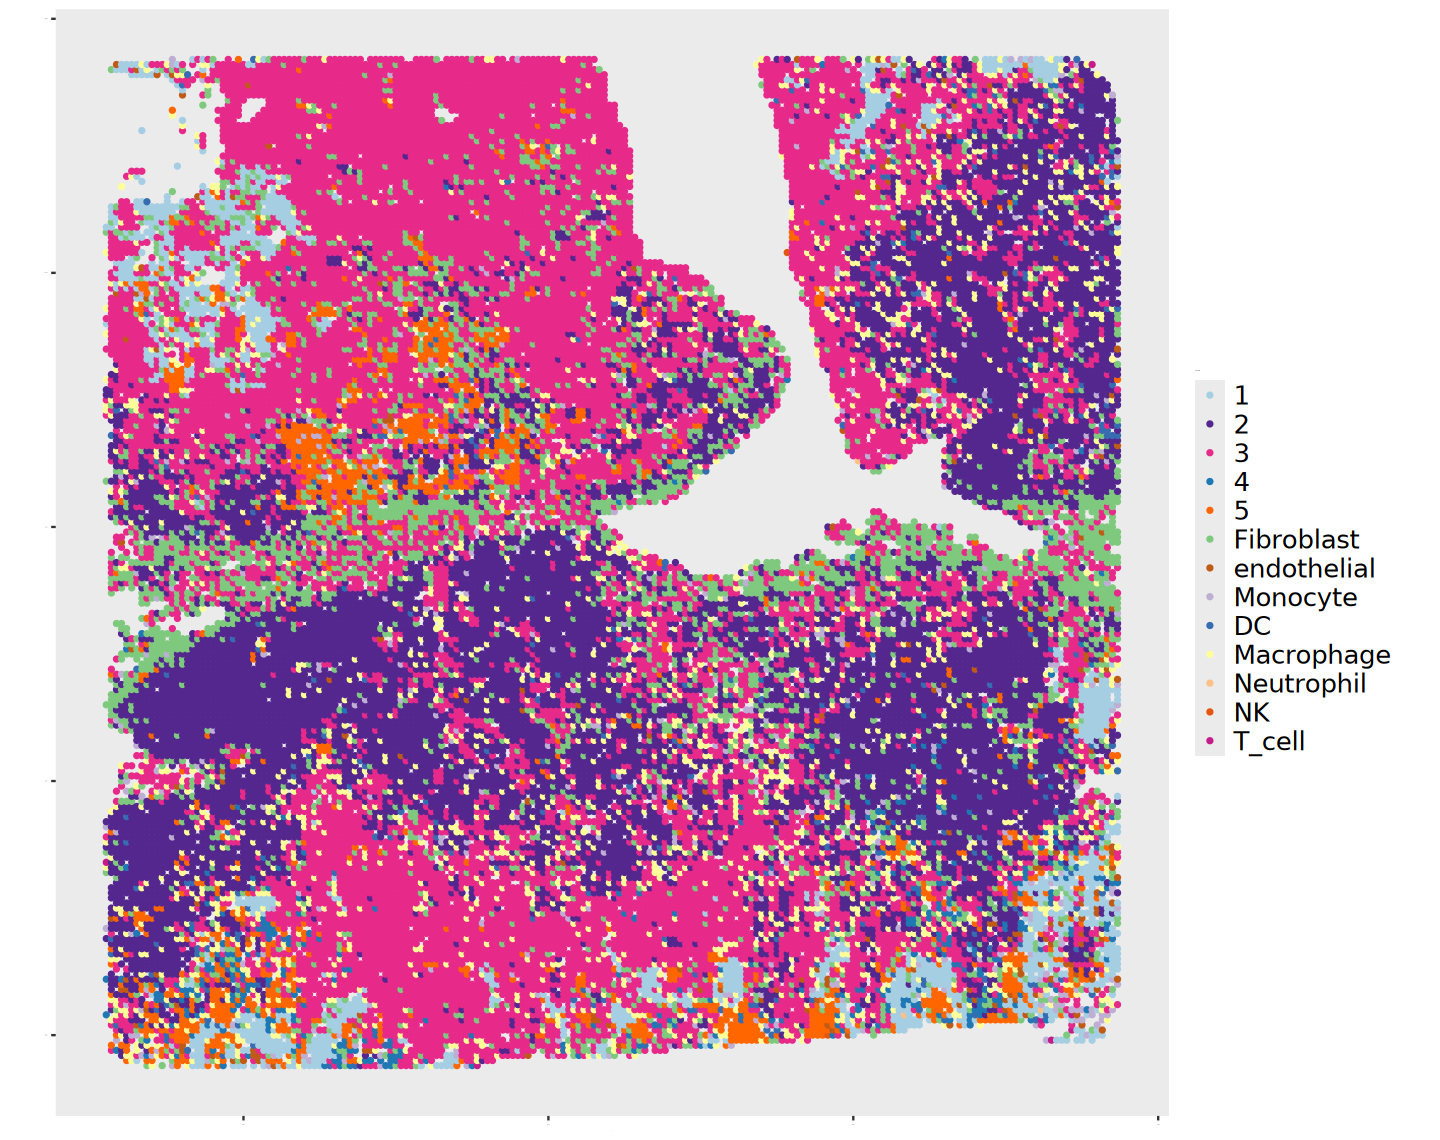

In [23]:
options(repr.plot.width = 12, repr.plot.height = 9.5)
plot <- ggplot(spatial@meta.data[spatial@meta.data$spot_class != 'reject',],aes(x=x,y=y,color=first_type)) + geom_point(size=1)+coord_fixed(ratio = 1) +
    scale_color_manual(breaks=c(1,2,3,4,5,'Fibroblast','endothelial','Monocyte','DC','Macrophage','Neutrophil','Mast_cell','NK','T_cell'),
        values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600',
                                 '#7fc97f','#bf5b17','#beaed4','#386cb0','#ffff99','#fdc086','#80cdc1','#e6550d','#c51b8a'))+
    theme(panel.grid=element_blank(),
                  axis.text = element_text(size=0),axis.title = element_text(size=0),
                  legend.text=element_text(size=15),legend.title=element_text(size=0))#+ theme(legend.position="none")
    #guides(color = guide_legend(override.aes = list(size = 5)))
print(plot)
ggsave(#dpi = 500,
  filename = paste0('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure4/T2_spatial_celltype_mapping_withlegend.pdf'), # 保存的文件名称。通过后缀来决定生成什么格式的图片
  width = 12,             # 宽
  height = 9.5
)

In [15]:
write.table(spatial@meta.data[spatial@meta.data$spot_class != 'reject',],file='/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/spacia_metadata.txt',quote=F,col.names = NA,sep=',')

## RCTD

In [48]:
library(Seurat)
library(spacexr)
library(ggplot2)
library(dplyr)
library(colorspace)
library(pals)

In [49]:
A <- c((0.18995),(0.19483),(0.19956),(0.20415),(0.2086),(0.21291),(0.21708),(0.22111),(0.225),(0.22875),(0.23236),(0.23582),(0.23915),(0.24234),(0.24539),(0.2483),(0.25107),(0.25369),(0.25618),(0.25853),(0.26074),(0.2628),(0.26473),(0.26652),(0.26816),(0.26967),(0.27103),(0.27226),(0.27334),(0.27429),(0.27509),(0.27576),(0.27628),(0.27667),(0.27691),(0.27701),(0.27698),(0.2768),(0.27648),(0.27603),(0.27543),(0.27469),(0.27381),(0.27273),(0.27106),(0.26878),(0.26592),(0.26252),(0.25862),(0.25425),(0.24946),(0.24427),(0.23874),(0.23288),(0.22676),(0.22039),(0.21382),(0.20708),(0.20021),(0.19326),(0.18625),(0.17923),(0.17223),(0.16529),(0.15844),(0.15173),(0.14519),(0.13886),(0.13278),(0.12698),(0.12151),(0.11639),(0.11167),(0.10738),(0.10357),(0.10026),(0.0975),(0.09532),(0.09377),(0.09287),(0.09267),(0.0932),(0.09451),(0.09662),(0.09958),(0.10342),(0.10815),(0.11374),(0.12014),(0.12733),(0.13526),(0.14391),(0.15323),(0.16319),(0.17377),(0.18491),(0.19659),(0.20877),(0.22142),(0.23449),(0.24797),(0.2618),(0.27597),(0.29042),(0.30513),(0.32006),(0.33517),(0.35043),(0.36581),(0.38127),(0.39678),(0.41229),(0.42778),(0.44321),(0.45854),(0.47375),(0.48879),(0.50362),(0.51822),(0.53255),(0.54658),(0.56026),(0.57357),(0.58646),(0.59891),(0.61088),(0.62233),(0.63323),(0.64362),(0.65394),(0.66428),(0.67462),(0.68494),(0.69525),(0.70553),(0.71577),(0.72596),(0.7361),(0.74617),(0.75617),(0.76608),(0.77591),(0.78563),(0.79524),(0.80473),(0.8141),(0.82333),(0.83241),(0.84133),(0.8501),(0.85868),(0.86709),(0.8753),(0.88331),(0.89112),(0.8987),(0.90605),(0.91317),(0.92004),(0.92666),(0.93301),(0.93909),(0.94489),(0.95039),(0.9556),(0.96049),(0.96507),(0.96931),(0.97323),(0.97679),(0.98),(0.98289),(0.98549),(0.98781),(0.98986),(0.99163),(0.99314),(0.99438),(0.99535),(0.99607),(0.99654),(0.99675),(0.99672),(0.99644),(0.99593),(0.99517),(0.99419),(0.99297),(0.99153),(0.98987),(0.98799),(0.9859),(0.9836),(0.98108),(0.97837),(0.97545),(0.97234),(0.96904),(0.96555),(0.96187),(0.95801),(0.95398),(0.94977),(0.94538),(0.94084),(0.93612),(0.93125),(0.92623),(0.92105),(0.91572),(0.91024),(0.90463),(0.89888),(0.89298),(0.88691),(0.88066),(0.87422),(0.8676),(0.86079),(0.8538),(0.84662),(0.83926),(0.83172),(0.82399),(0.81608),(0.80799),(0.79971),(0.79125),(0.7826),(0.77377),(0.76476),(0.75556),(0.74617),(0.73661),(0.72686),(0.71692),(0.7068),(0.6965),(0.68602),(0.67535),(0.66449),(0.65345),(0.64223),(0.63082),(0.61923),(0.60746),(0.5955),(0.58336),(0.57103),(0.55852),(0.54583),(0.53295),(0.51989),(0.50664),(0.49321),(0.4796))
B <- c((0.07176),(0.08339),(0.09498),(0.10652),(0.11802),(0.12947),(0.14087),(0.15223),(0.16354),(0.17481),(0.18603),(0.1972),(0.20833),(0.21941),(0.23044),(0.24143),(0.25237),(0.26327),(0.27412),(0.28492),(0.29568),(0.30639),(0.31706),(0.32768),(0.33825),(0.34878),(0.35926),(0.3697),(0.38008),(0.39043),(0.40072),(0.41097),(0.42118),(0.43134),(0.44145),(0.45152),(0.46153),(0.47151),(0.48144),(0.49132),(0.50115),(0.51094),(0.52069),(0.5304),(0.54015),(0.54995),(0.55979),(0.56967),(0.57958),(0.5895),(0.59943),(0.60937),(0.61931),(0.62923),(0.63913),(0.64901),(0.65886),(0.66866),(0.67842),(0.68812),(0.69775),(0.70732),(0.7168),(0.7262),(0.73551),(0.74472),(0.75381),(0.76279),(0.77165),(0.78037),(0.78896),(0.7974),(0.80569),(0.81381),(0.82177),(0.82955),(0.83714),(0.84455),(0.85175),(0.85875),(0.86554),(0.87211),(0.87844),(0.88454),(0.8904),(0.896),(0.90142),(0.90673),(0.91193),(0.91701),(0.92197),(0.9268),(0.93151),(0.93609),(0.94053),(0.94484),(0.94901),(0.95304),(0.95692),(0.96065),(0.96423),(0.96765),(0.97092),(0.97403),(0.97697),(0.97974),(0.98234),(0.98477),(0.98702),(0.98909),(0.99098),(0.99268),(0.99419),(0.99551),(0.99663),(0.99755),(0.99828),(0.99879),(0.9991),(0.99919),(0.99907),(0.99873),(0.99817),(0.99739),(0.99638),(0.99514),(0.99366),(0.99195),(0.98999),(0.98775),(0.98524),(0.98246),(0.97941),(0.9761),(0.97255),(0.96875),(0.9647),(0.96043),(0.95593),(0.95121),(0.94627),(0.94113),(0.93579),(0.93025),(0.92452),(0.91861),(0.91253),(0.90627),(0.89986),(0.89328),(0.88655),(0.87968),(0.87267),(0.86553),(0.85826),(0.85087),(0.84337),(0.83576),(0.82806),(0.82025),(0.81236),(0.80439),(0.79634),(0.78823),(0.78005),(0.77181),(0.76352),(0.75519),(0.74682),(0.73842),(0.73),(0.7214),(0.7125),(0.7033),(0.69382),(0.68408),(0.67408),(0.66386),(0.65341),(0.64277),(0.63193),(0.62093),(0.60977),(0.59846),(0.58703),(0.57549),(0.56386),(0.55214),(0.54036),(0.52854),(0.51667),(0.50479),(0.49291),(0.48104),(0.4692),(0.4574),(0.44565),(0.43399),(0.42241),(0.41093),(0.39958),(0.38836),(0.37729),(0.36638),(0.35566),(0.34513),(0.33482),(0.32473),(0.31489),(0.3053),(0.29599),(0.28696),(0.27824),(0.26981),(0.26152),(0.25334),(0.24526),(0.2373),(0.22945),(0.2217),(0.21407),(0.20654),(0.19912),(0.19182),(0.18462),(0.17753),(0.17055),(0.16368),(0.15693),(0.15028),(0.14374),(0.13731),(0.13098),(0.12477),(0.11867),(0.11268),(0.1068),(0.10102),(0.09536),(0.0898),(0.08436),(0.07902),(0.0738),(0.06868),(0.06367),(0.05878),(0.05399),(0.04931),(0.04474),(0.04028),(0.03593),(0.03169),(0.02756),(0.02354),(0.01963),(0.01583))
C <- c((0.23217),(0.26149),(0.29024),(0.31844),(0.34607),(0.37314),(0.39964),(0.42558),(0.45096),(0.47578),(0.50004),(0.52373),(0.54686),(0.56942),(0.59142),(0.61286),(0.63374),(0.65406),(0.67381),(0.693),(0.71162),(0.72968),(0.74718),(0.76412),(0.7805),(0.79631),(0.81156),(0.82624),(0.84037),(0.85393),(0.86692),(0.87936),(0.89123),(0.90254),(0.91328),(0.92347),(0.93309),(0.94214),(0.95064),(0.95857),(0.96594),(0.97275),(0.97899),(0.98461),(0.9893),(0.99303),(0.99583),(0.99773),(0.99876),(0.99896),(0.99835),(0.99697),(0.99485),(0.99202),(0.98851),(0.98436),(0.97959),(0.97423),(0.96833),(0.9619),(0.95498),(0.94761),(0.93981),(0.93161),(0.92305),(0.91416),(0.90496),(0.8955),(0.8858),(0.8759),(0.86581),(0.85559),(0.84525),(0.83484),(0.82437),(0.81389),(0.80342),(0.79299),(0.78264),(0.7724),(0.7623),(0.75237),(0.74265),(0.73316),(0.72393),(0.715),(0.70599),(0.69651),(0.6866),(0.67627),(0.66556),(0.65448),(0.64308),(0.63137),(0.61938),(0.60713),(0.59466),(0.58199),(0.56914),(0.55614),(0.54303),(0.52981),(0.51653),(0.50321),(0.48987),(0.47654),(0.46325),(0.45002),(0.43688),(0.42386),(0.41098),(0.39826),(0.38575),(0.37345),(0.3614),(0.34963),(0.33816),(0.32701),(0.31622),(0.30581),(0.29581),(0.28623),(0.27712),(0.26849),(0.26038),(0.2528),(0.24579),(0.23937),(0.23356),(0.22835),(0.2237),(0.2196),(0.21602),(0.21294),(0.21032),(0.20815),(0.2064),(0.20504),(0.20406),(0.20343),(0.20311),(0.2031),(0.20336),(0.20386),(0.20459),(0.20552),(0.20663),(0.20788),(0.20926),(0.21074),(0.2123),(0.21391),(0.21555),(0.21719),(0.2188),(0.22038),(0.22188),(0.22328),(0.22456),(0.2257),(0.22667),(0.22744),(0.228),(0.22831),(0.22836),(0.22811),(0.22754),(0.22663),(0.22536),(0.22369),(0.22161),(0.21918),(0.2165),(0.21358),(0.21043),(0.20706),(0.20348),(0.19971),(0.19577),(0.19165),(0.18738),(0.18297),(0.17842),(0.17376),(0.16899),(0.16412),(0.15918),(0.15417),(0.1491),(0.14398),(0.13883),(0.13367),(0.12849),(0.12332),(0.11817),(0.11305),(0.10797),(0.10294),(0.09798),(0.0931),(0.08831),(0.08362),(0.07905),(0.07461),(0.07031),(0.06616),(0.06218),(0.05837),(0.05475),(0.05134),(0.04814),(0.04516),(0.04243),(0.03993),(0.03753),(0.03521),(0.03297),(0.03082),(0.02875),(0.02677),(0.02487),(0.02305),(0.02131),(0.01966),(0.01809),(0.0166),(0.0152),(0.01387),(0.01264),(0.01148),(0.01041),(0.00942),(0.00851),(0.00769),(0.00695),(0.00629),(0.00571),(0.00522),(0.00481),(0.00449),(0.00424),(0.00408),(0.00401),(0.00401),(0.0041),(0.00427),(0.00453),(0.00486),(0.00529),(0.00579),(0.00638),(0.00705),(0.0078),(0.00863),(0.00955),(0.01055))
  
turbo_colormap_data<-cbind(A,B,C) 
turbo_colormap_data_sRGB<-sRGB(turbo_colormap_data)
turbo_colormap_data_HEX = hex(turbo_colormap_data_sRGB)

TurboPalette<-colorRampPalette(colors = turbo_colormap_data_HEX ,space="rgb", interpolate = "spline")
#pal.test(viridis(option = "D",n = 256))



Turbo <- function(pal.min = 0,pal.max = 1,out.colors = NULL,pal = turbo_colormap_data_HEX,reverse = F) {
 # pal.min = lower bound of the palette to use [0,1]
 # pal.max = upper bound of the palette [0,1]
 # out.colors = specify the number of colors to return
     # if out.colors = 1, will return pal.min color. if unspecified, will return all the colors
     # in the original palette that fall within the min and max boundaries
 # pal = vector of colors (HEX) in palette
 # reverse = flip palette T/F - performed as last step
  
  if(pal.min == 0){pal.start = 1}
  if(pal.min > 0){pal.start = round(length(pal)*pal.min) }
  pal.end = round(length(pal)*pal.max )
  out = pal[pal.start:pal.end]
  
 if(!is.null(out.colors)){
   pal2 = colorRampPalette(colors = out ,space="rgb", interpolate = "linear")
   out = pal2(out.colors)
 }
  if(reverse == T){out = rev(out)}
  
  return(out)
}

In [50]:
spatial <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/bin50_seurat.rds')
DefaultAssay(spatial) <- 'RNA'
spatial <- NormalizeData(spatial)

Normalizing layer: counts



In [51]:
RCTD <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/SPATIAL/T2/RCTD_results_full.rds')
colnames(RCTD@results$weights) <- paste0('ST_',colnames(RCTD@results$weights))
norm_weights <- normalize_weights(RCTD@results$weights)
spatial <- AddMetaData(spatial, metadata = norm_weights)

In [52]:
spatial@meta.data

orig.ident nCount_RNA nFeature_RNA orig.ident.1 x     y    
7086696041100  lung        583       305          sample       1650  2700 
7086696041150  lung        368       201          sample       1650  2750 
7086696041400  lung        445       238          sample       1650  3000 
7086696041450  lung        507       254          sample       1650  3050 
7086696041850  lung        400       219          sample       1650  3450 
7086696041900  lung        415       226          sample       1650  3500 
7086696041950  lung        420       216          sample       1650  3550 
7086696042000  lung        433       233          sample       1650  3600 
7086696042050  lung        393       215          sample       1650  3650 
7086696042200  lung        383       201          sample       1650  3800 
7086696042250  lung        432       237          sample       1650  3850 
7086696042500  lung        371       200          sample       1650  4100 
7086696042550  lung        422       220          sample       1650  4150 
7086696042600  lung        471       247          sample       1650  4200 
7086696042650  lung        444       224          sample       1650  4250 
7086696042700  lung        545       270          sample       1650  4300 
7086696042750  lung        615       309          sample       1650  4350 
7086696042800  lung        672       336          sample       1650  4400 
7086696042850  lung        738       355          sample       1650  4450 
7086696042900  lung        882       443          sample       1650  4500 
7086696042950  lung        729       384          sample       1650  4550 
7086696043000  lung        418       242          sample       1650  4600 
7086696044150  lung        362       201          sample       1650  5750 
7086696044200  lung        584       312          sample       1650  5800 
7086696046200  lung        405       238          sample       1650  7800 
7086696046350  lung        694       357          sample       1650  7950 
7086696047000  lung        542       262          sample       1650  8600 
7086696047050  lung        891       440          sample       1650  8650 
7086696047100  lung        820       350          sample       1650  8700 
7086696047150  lung       1148       491          sample       1650  8750 
⋮              ⋮          ⋮          ⋮            ⋮            ⋮     ⋮    
49821620643600 lung       1242       535          sample       11600 10000
49821620643650 lung       1028       478          sample       11600 10050
49821620643700 lung       1221       552          sample       11600 10100
49821620643750 lung        896       433          sample       11600 10150
49821620643800 lung       1188       570          sample       11600 10200
49821620643850 lung       1157       523          sample       11600 10250
49821620643900 lung       1080       532          sample       11600 10300
49821620643950 lung       1192       531          sample       11600 10350
49821620644000 lung       1387       612          sample       11600 10400
49821620644050 lung       1006       465          sample       11600 10450
49821620644100 lung        762       374          sample       11600 10500
49821620644150 lung        983       446          sample       11600 10550
49821620644200 lung        903       396          sample       11600 10600
49821620644250 lung        823       395          sample       11600 10650
49821620644300 lung       1145       534          sample       11600 10700
49821620644350 lung        626       323          sample       11600 10750
49821620644400 lung        835       405          sample       11600 10800
49821620644450 lung        828       394          sample       11600 10850
49821620644500 lung        663       321          sample       11600 10900
49821620644550 lung        976       429          sample       11600 10950
49821620644600 lung       1204       541          sample       11600 11000
49821620644650 lung       1024       499

In [53]:
spatial@meta.data[,12:16]

ST_1         ST_2         ST_3         ST_4         ST_5        
7086696041100  1.911590e-04 0.0002247976 2.256295e-04 6.763126e-01 8.133697e-02
7086696041150  9.810978e-05 0.0559619825 8.350034e-01 9.810978e-05 9.810978e-05
7086696041400  5.059642e-02 0.5865889506 7.885173e-05 3.286694e-01 6.795890e-05
7086696041450  7.850738e-05 0.0005175542 7.850738e-05 6.262574e-01 3.008553e-01
7086696041850  2.167813e-01 0.7525651552 1.215148e-04 1.215148e-04 1.215148e-04
7086696041900  2.096853e-01 0.3289012869 2.185207e-01 1.852966e-04 1.852966e-04
7086696041950  8.039182e-02 0.2686943406 1.356036e-04 4.453749e-01 1.356036e-04
7086696042000  5.456492e-01 0.2801638010 1.776722e-04 1.776722e-04 1.776722e-04
7086696042050  3.985182e-01 0.4682353245 6.428810e-02 1.326406e-04 1.326406e-04
7086696042200  5.215258e-03 0.3550163976 2.997188e-01 9.384856e-02 2.005106e-04
7086696042250  7.837903e-05 0.3191156823 7.837903e-05 4.776540e-01 7.837903e-05
7086696042500  1.154797e-01 0.1298731928 4.797584e-05 4.912318e-01 9.085957e-02
7086696042550  3.740935e-01 0.4552175013 1.065933e-04 1.065933e-04 1.035088e-01
7086696042600  1.147119e-04 0.3301060145 5.019865e-01 1.147119e-04 1.147119e-04
7086696042650  2.708874e-01 0.4689557969 1.662405e-04 1.662405e-04 1.662405e-04
7086696042700  3.694922e-01 0.4058089074 1.625765e-04 1.625765e-04 1.625765e-04
7086696042750  3.172520e-01 0.6438838756 6.846361e-05 1.124555e-04 6.846361e-05
7086696042800  1.106467e-02 0.7019419377 1.651339e-04 1.357239e-01 1.651339e-04
7086696042850  5.305518e-02 0.1603441937 6.698935e-01 6.391997e-05 6.391997e-05
7086696042900  1.765149e-04 0.5517206379 1.765149e-04 1.765149e-04 2.768566e-01
7086696042950  1.851657e-04 0.2789184700 3.454848e-01 2.677807e-01 1.851657e-04
7086696043000  1.754078e-04 0.8098360345 2.309277e-04 1.148243e-04 1.148243e-04
7086696044150  2.073847e-04 0.1994009610 2.657015e-01 2.073847e-04 2.073847e-04
7086696044200  6.049741e-01 0.0001977604 1.977604e-04 1.977604e-04 1.977604e-04
7086696046200  2.474414e-04 0.2926109349 4.498352e-01 2.474414e-04 9.119359e-02
7086696046350  3.225762e-01 0.4477784942 1.206158e-04 3.425274e-02 1.206158e-04
7086696047000  2.082680e-04 0.0002082680 8.403302e-01 2.082680e-04 2.082680e-04
7086696047050  1.662327e-04 0.5475363034 1.623444e-01 1.369470e-01 1.662327e-04
7086696047100  3.005514e-01 0.1396170038 4.665378e-01 1.640078e-04 1.640078e-04
7086696047150  1.303510e-01 0.0699327261 6.846776e-01 1.128013e-04 1.128013e-04
⋮              ⋮            ⋮            ⋮            ⋮            ⋮           
49821620643600 1.154046e-04 0.8140529785 7.290999e-02 2.473644e-03 1.154046e-04
49821620643650 1.234845e-01 0.4430990832 2.673573e-04 2.673573e-04 2.877706e-01
49821620643700 1.687220e-04 0.7781150086 1.707282e-04 2.533734e-02 9.142059e-02
49821620643750 1.170851e-04 0.5452980713 1.170851e-04 3.975105e-01 1.170851e-04
49821620643800 1.171968e-04 0.7423216652 2.575931e-02 4.494041e-02 1.029991e-01
49821620643850 3.369354e-01 0.1583390108 2.613443e-01 8.174419e-02 1.775293e-04
49821620643900 1.691824e-04 0.8313150758 8.698155e-02 1.691824e-04 1.691824e-04
49821620643950 1.079063e-04 0.7713244191 2.898838e-04 1.668581e-01 1.079063e-04
49821620644000 5.460898e-01 0.3336794450 8.001153e-03 1.278721e-04 1.278721e-04
49821620644050 6.746968e-01 0.0001216921 1.660608e-01 1.216921e-04 1.216921e-04
49821620644100 2.224533e-01 0.6997799916 9.433890e-05 1.378069e-04 9.433890e-05
49821620644150 6.411817e-02 0.0509863626 6.381454e-01 1.724962e-01 1.210186e-04
49821620644200 1.181534e-04 0.3951142166 4.928167e-01 1.181534e-04 6.690915e-02
49821620644250 4.860200e-01 0.2634601320 1.476267e-01 1.382467e-04 5.194833e-02
49821620644300 1.021038e-04 0.1520100735 7.129747e-01 6.987490e-02 1.021038e-04
49821620644350 1.560526e-04 0.4284375894 1.706516e-04 4.200098e-01 1.560526e-04
49821620644400 1.898125e-04 0.8592544362 3.177020e-04 1.898125e-04 1.898125e-04
49821620644450 5.712085e-01 0.3155155065 3.771868e-02 3.521732e-02 4.962198e-05
49821620644500 

In [54]:
library(ggpubr)

In [55]:
colnames(spatial@meta.data[,12:25])

[1] "ST_1"           "ST_2"           "ST_3"           "ST_4"          
 [5] "ST_5"           "ST_DC"          "ST_endothelial" "ST_Fibroblast" 
 [9] "ST_Macrophage"  "ST_Mast_cell"   "ST_Monocyte"    "ST_Neutrophil" 
[13] "ST_NK"          "ST_T_cell"

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


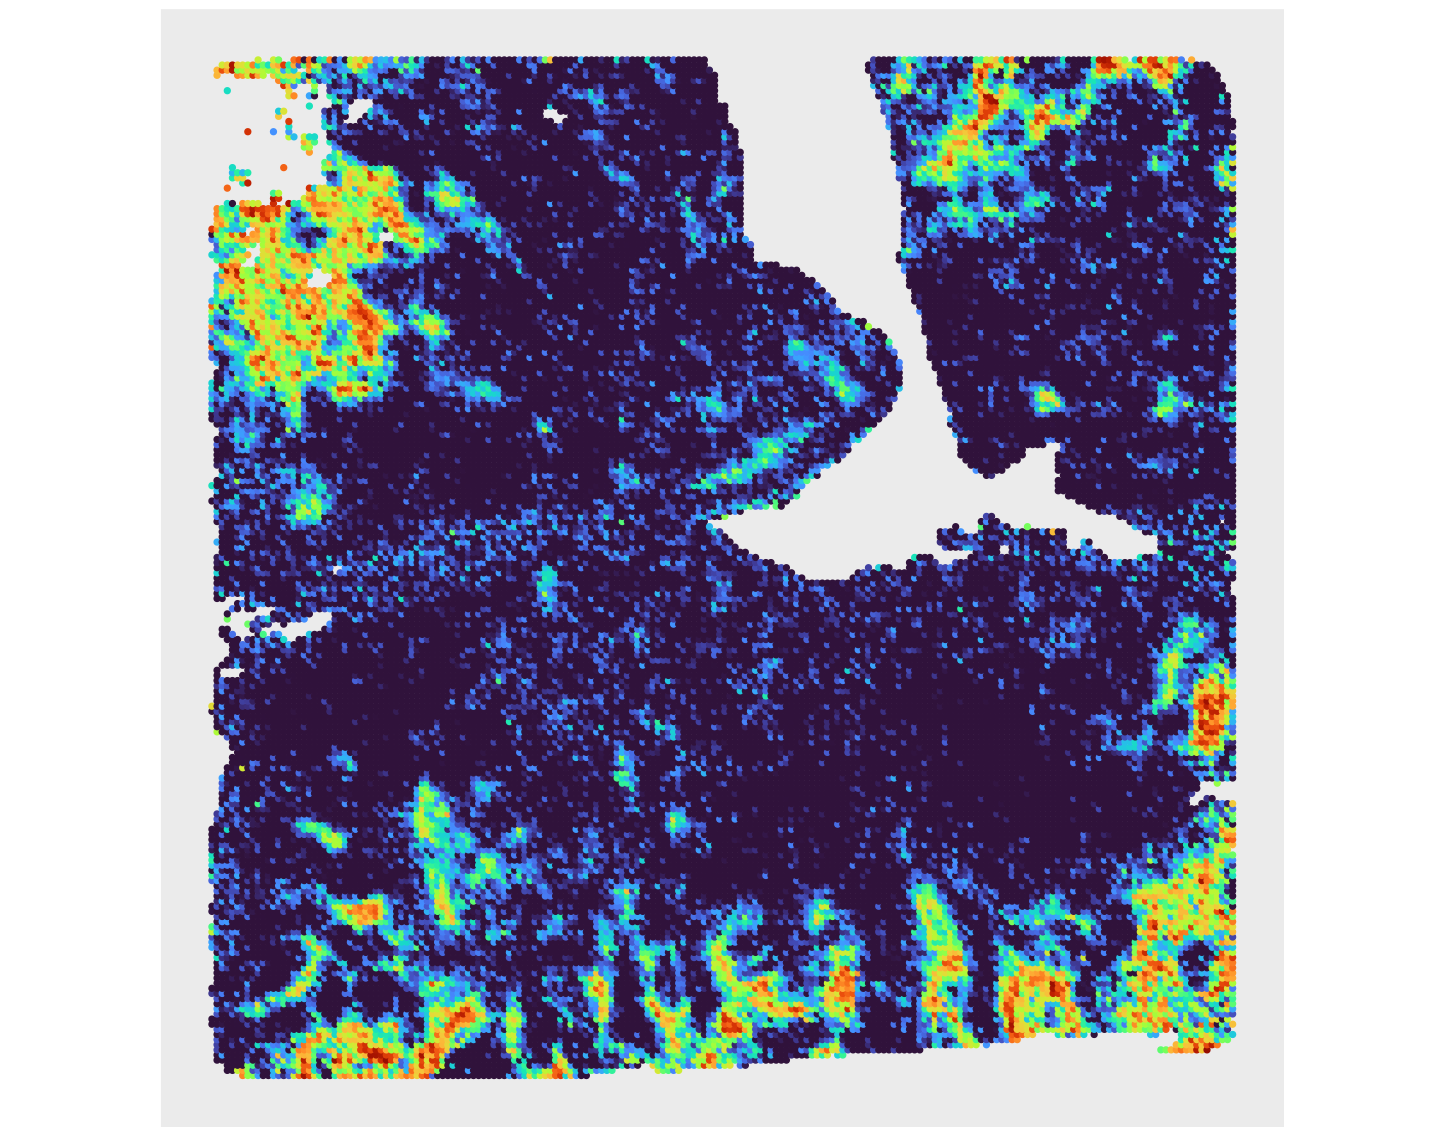

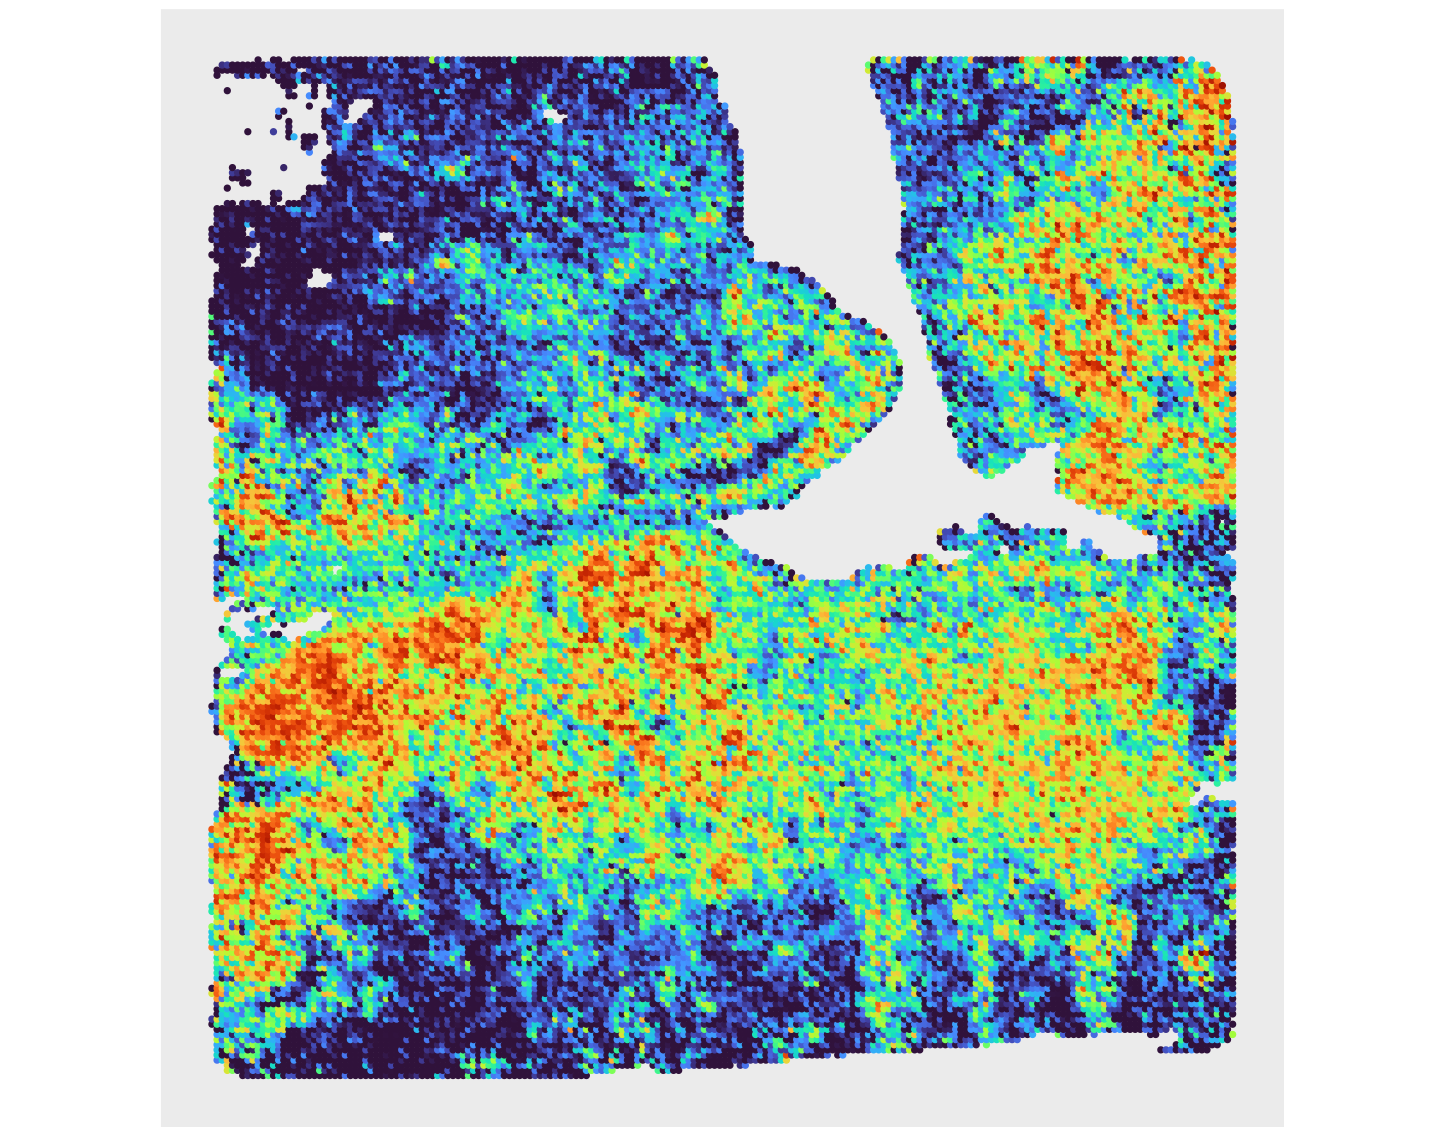

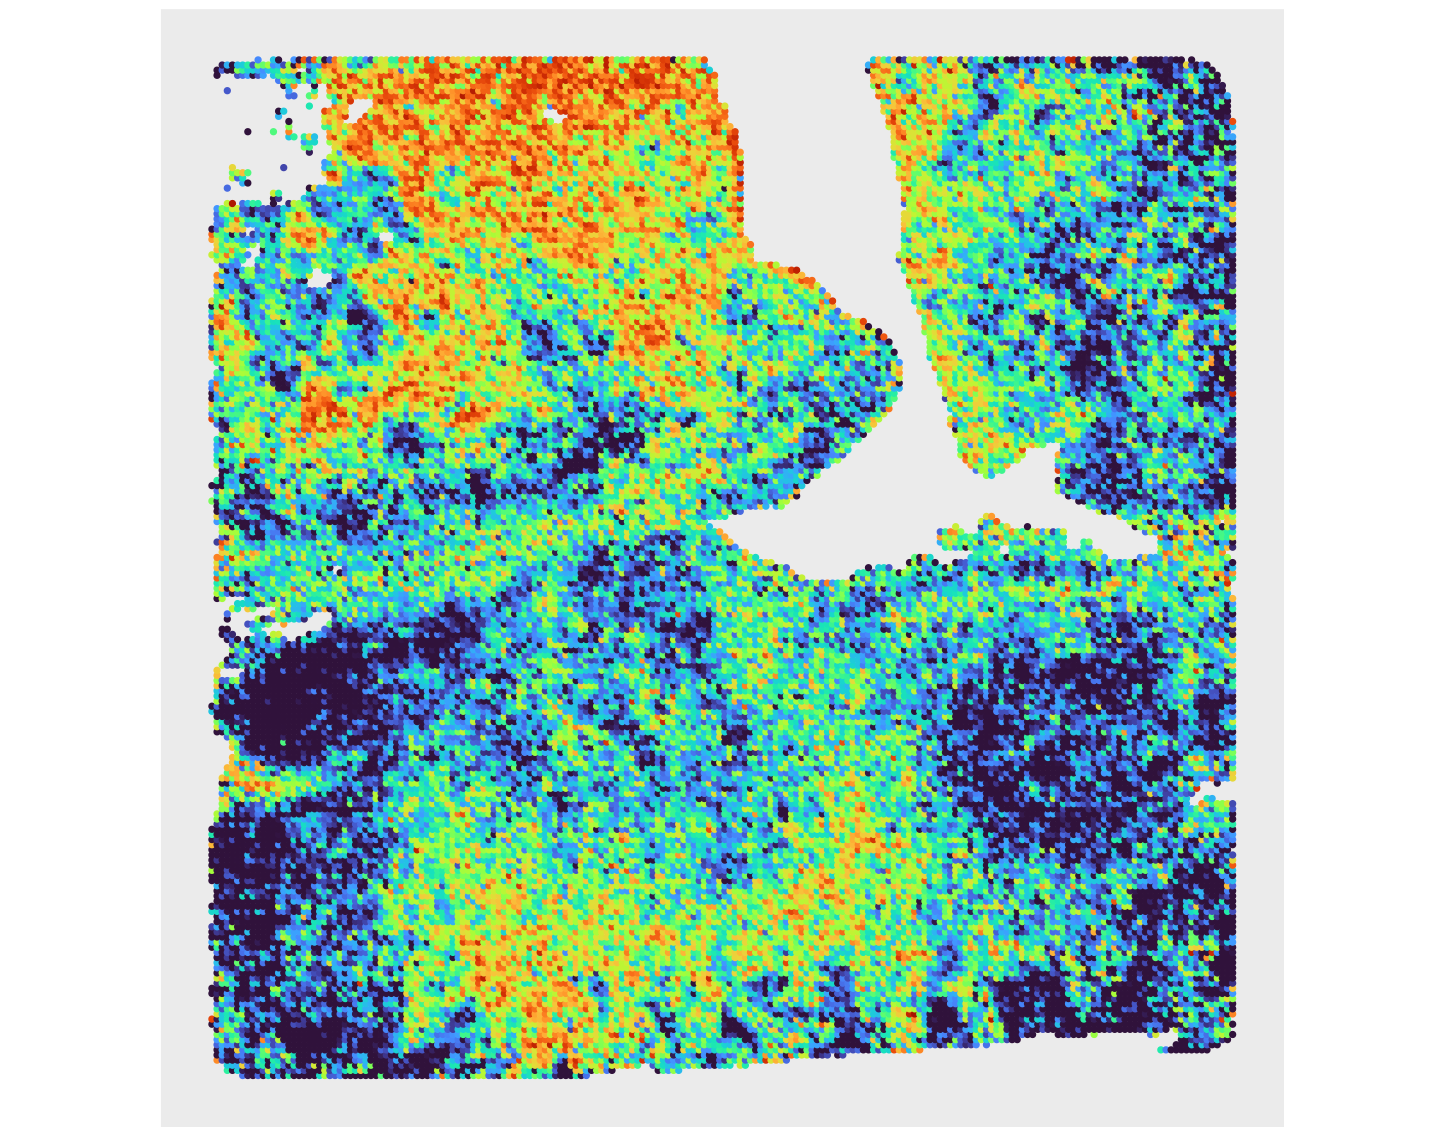

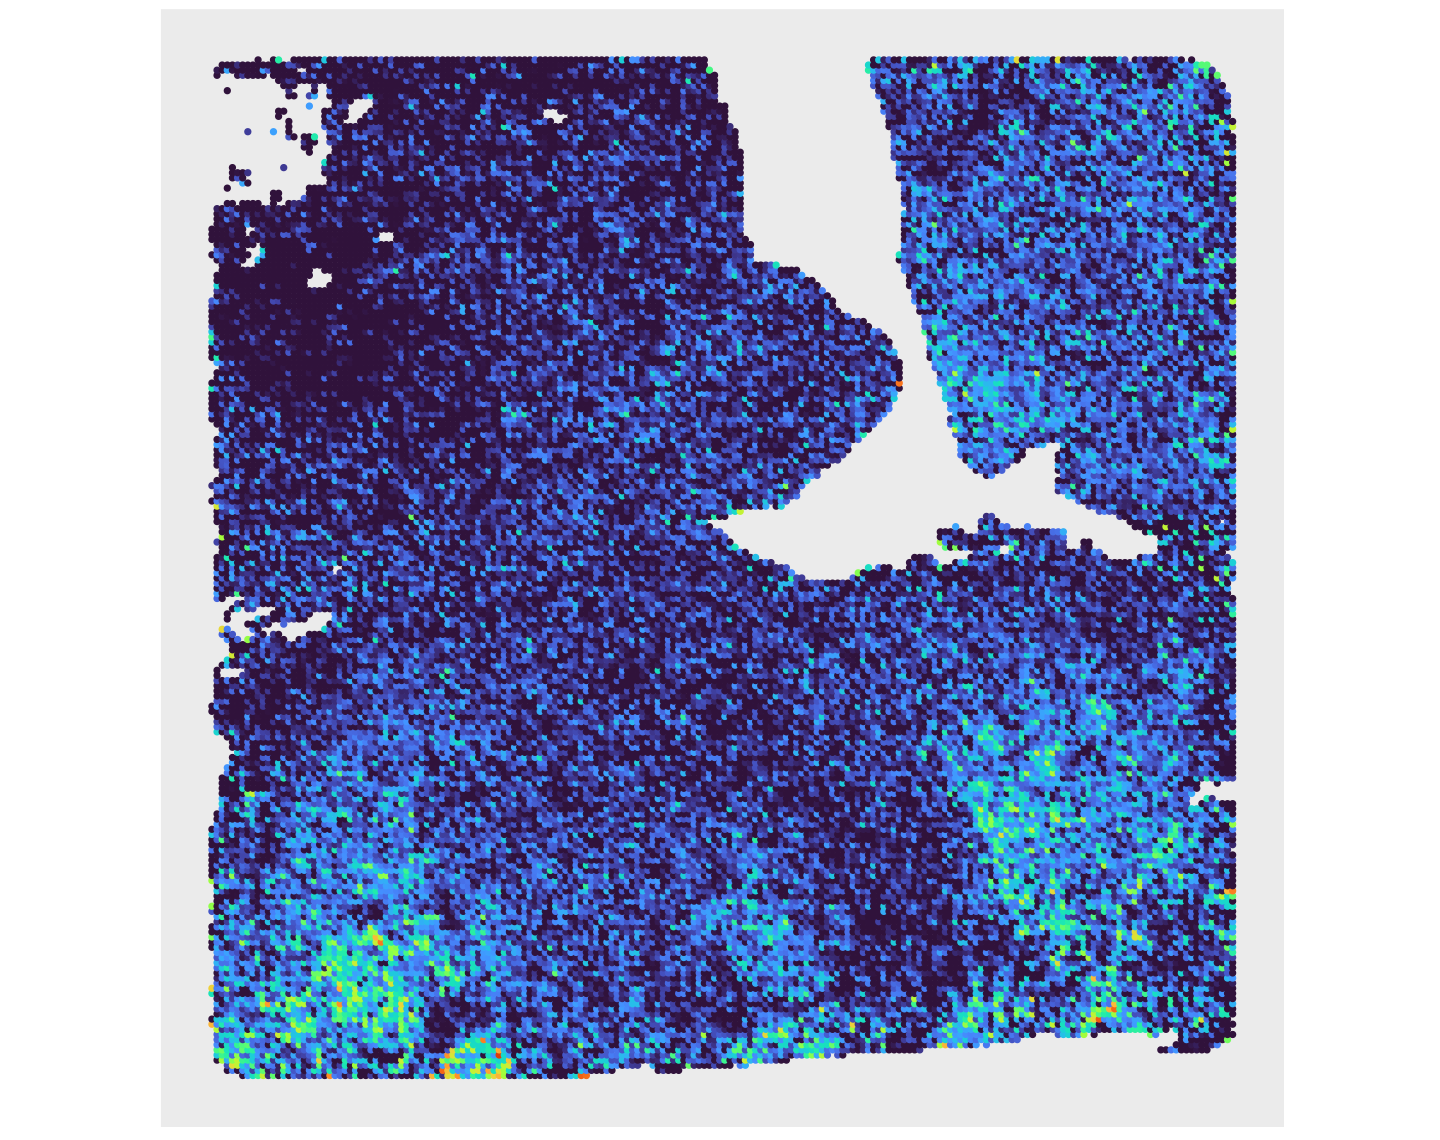

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 9.5)
for(cell_type in colnames(spatial@meta.data[,12:16])){
   
plot <- ggplot(spatial@meta.data,aes_string(x='x',y='y',color=cell_type)) + geom_point(size=1)+
scale_color_gradientn(colours = Turbo(pal.min =  min(spatial@meta.data[,cell_type]),pal.max =  max(spatial@meta.data[,cell_type]))) + coord_fixed(ratio = 1) +
    theme(panel.grid=element_blank(),axis.ticks = element_blank(),
                  axis.text = element_blank(),axis.title = element_blank(),
                 legend.text=element_text(size=15),legend.title=element_text(size=0)
         )   + theme(legend.position="none")  
print(plot)
ggsave(#dpi=500,
  filename = paste0('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure4/T2_',as.character(cell_type),'_heatmap.pdf'), # 保存的文件名称。通过后缀来决定生成什么格式的图片
  width = 12,             # 宽
  height = 9.5
)
}


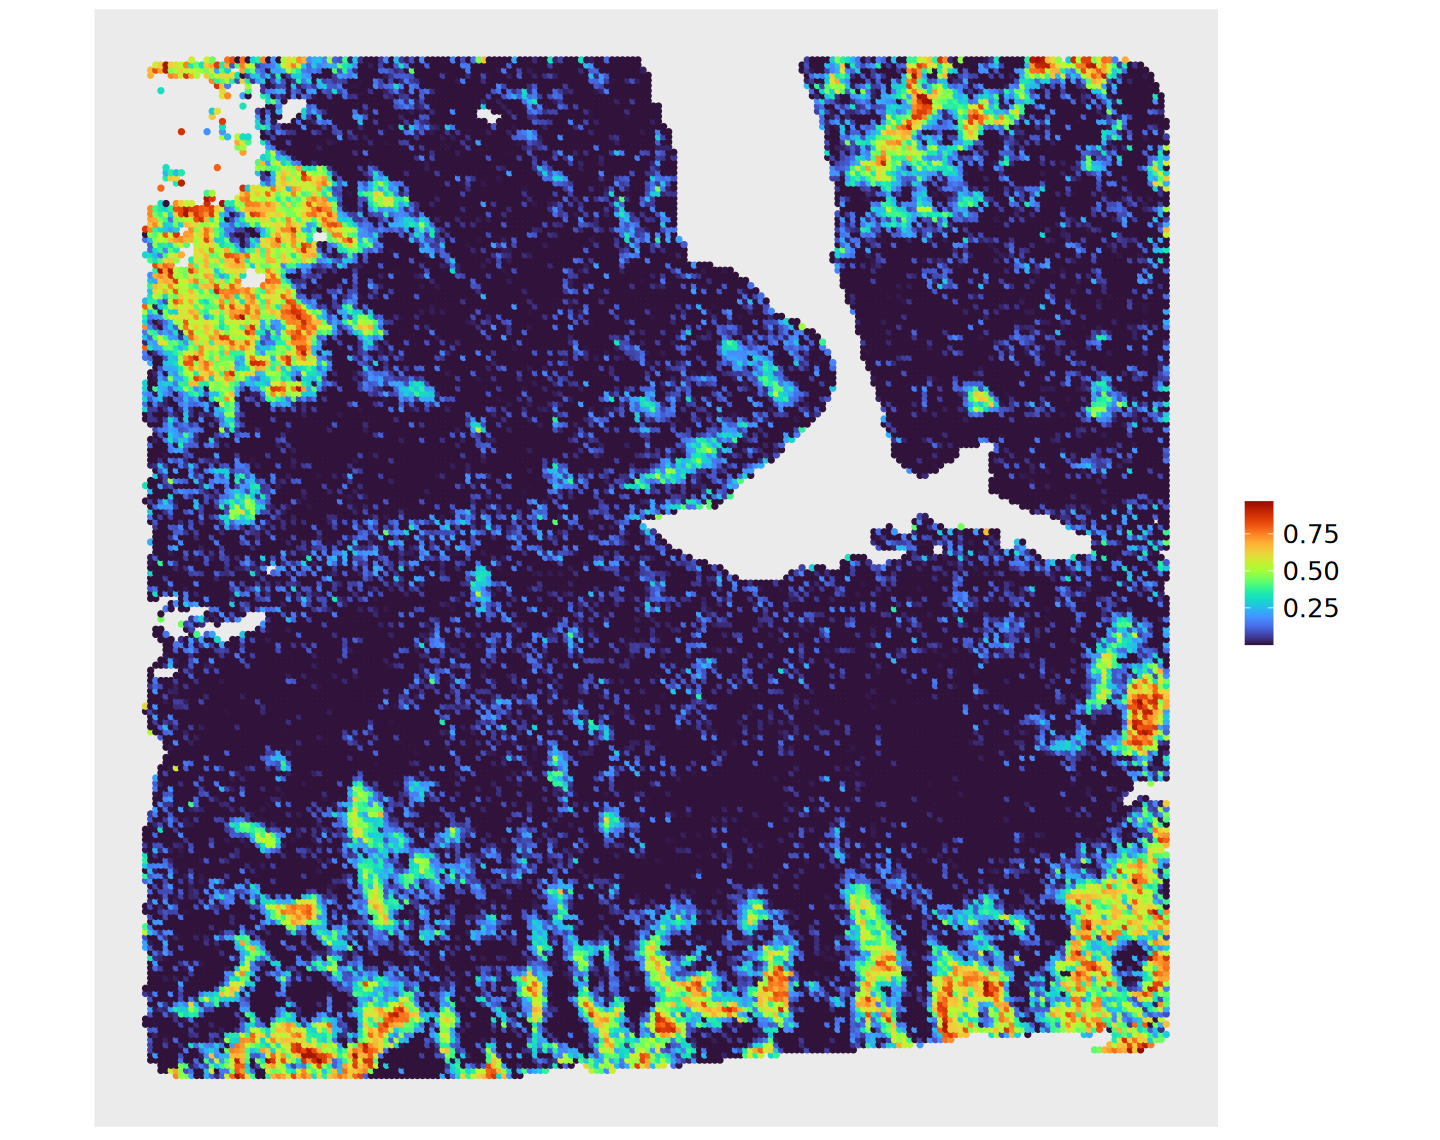

In [31]:
options(repr.plot.width = 12, repr.plot.height = 9.5)
for(cell_type in colnames(spatial@meta.data[,12:16])){
   
plot <- ggplot(spatial@meta.data,aes_string(x='x',y='y',color=cell_type)) + geom_point(size=1)+
scale_color_gradientn(colours = Turbo(pal.min =  min(spatial@meta.data[,cell_type]),pal.max =  max(spatial@meta.data[,cell_type]))) + coord_fixed(ratio = 1) +
    theme(panel.grid=element_blank(),axis.ticks = element_blank(),
                  axis.text = element_blank(),axis.title = element_blank(),
                 legend.text=element_text(size=15),legend.title=element_text(size=0)
         )   #+ theme(legend.position="none")  
print(plot)
ggsave(#dpi=500,
  filename = paste0('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure4/T2_',as.character(cell_type),'_heatmap_legend.pdf'), # 保存的文件名称。通过后缀来决定生成什么格式的图片
  width = 12,             # 宽
  height = 9.5
)
    break
}
